In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [62]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [63]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [115]:
def volatility_adjusted_smart_money(df, window=60, atr_period=14):
    """
    基于波动性的聪明钱因子
    - 使用ATR调整聪明钱效应，适应不同波动性环境
    """
    close = df['close']
    price_diff = close.diff()
    
    taker_ratio = df['taker_buy_volume'] / df['volume'].replace(0, 1e-12)
    
    gain = (price_diff * taker_ratio).where(price_diff > 0, 0)
    loss = (-price_diff * (1 - taker_ratio)).where(price_diff < 0, 0)
    
    sum_gain = gain.rolling(window).sum()
    sum_loss = loss.rolling(window).sum()
    
    # 波动性调整：避免除以零
    atr = ta.atr(df['high'], df['low'], close, length=atr_period)
    
    volatility_adjustment = atr.rolling(window).mean()
    factor = (sum_gain - sum_loss) / volatility_adjustment
    
    return factor

# 因子测试

In [116]:
evaluator.set_factor(
    factor_func=volatility_adjusted_smart_money,
    factor_name='volatility_adjusted_smart_money'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.021200
   Rank_IC (Spearman): -0.022571
📊 信息比率:
   IR: 0.170832
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 129945
   因子列: volatility_adjusted_smart_money
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


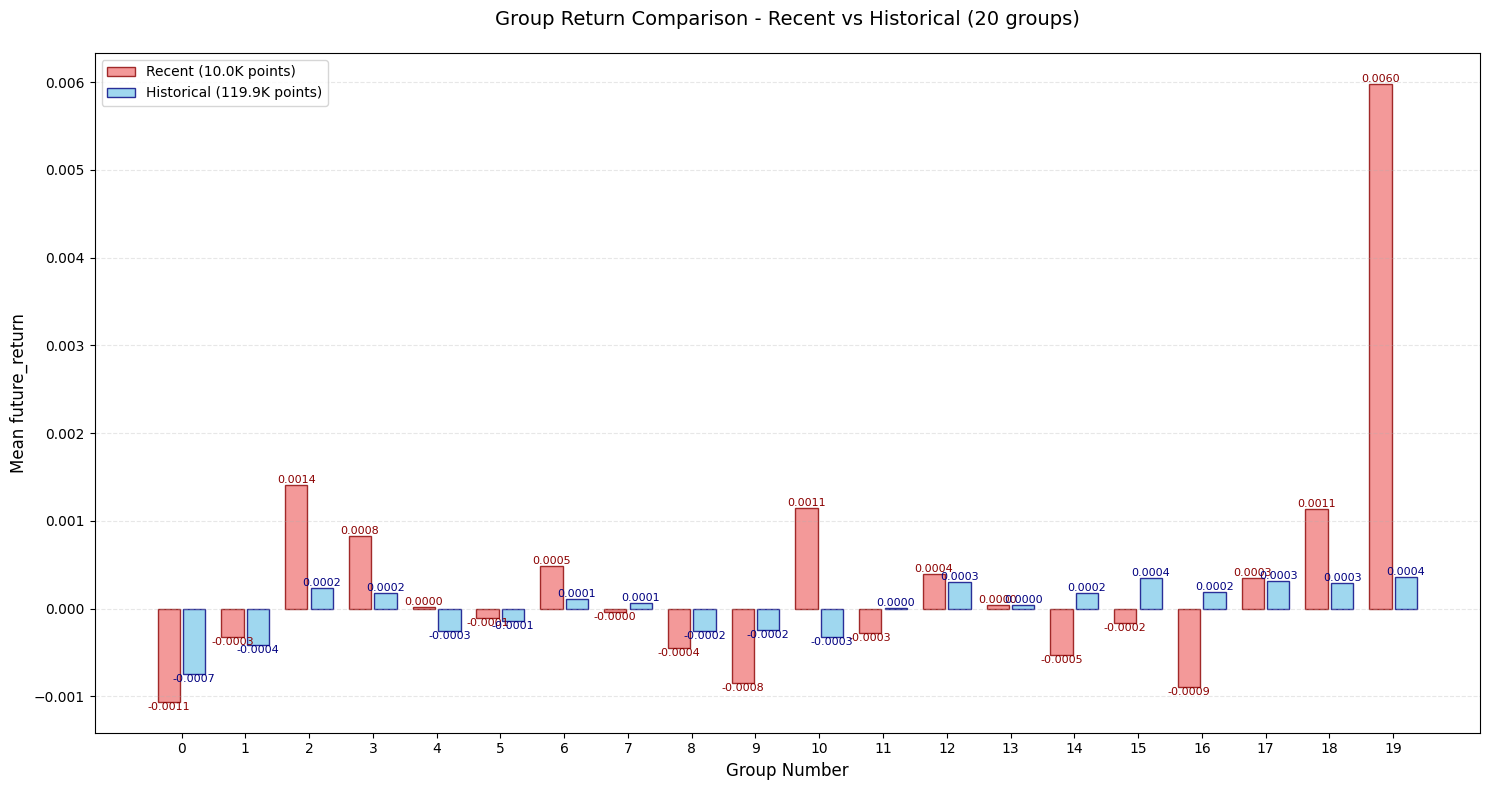

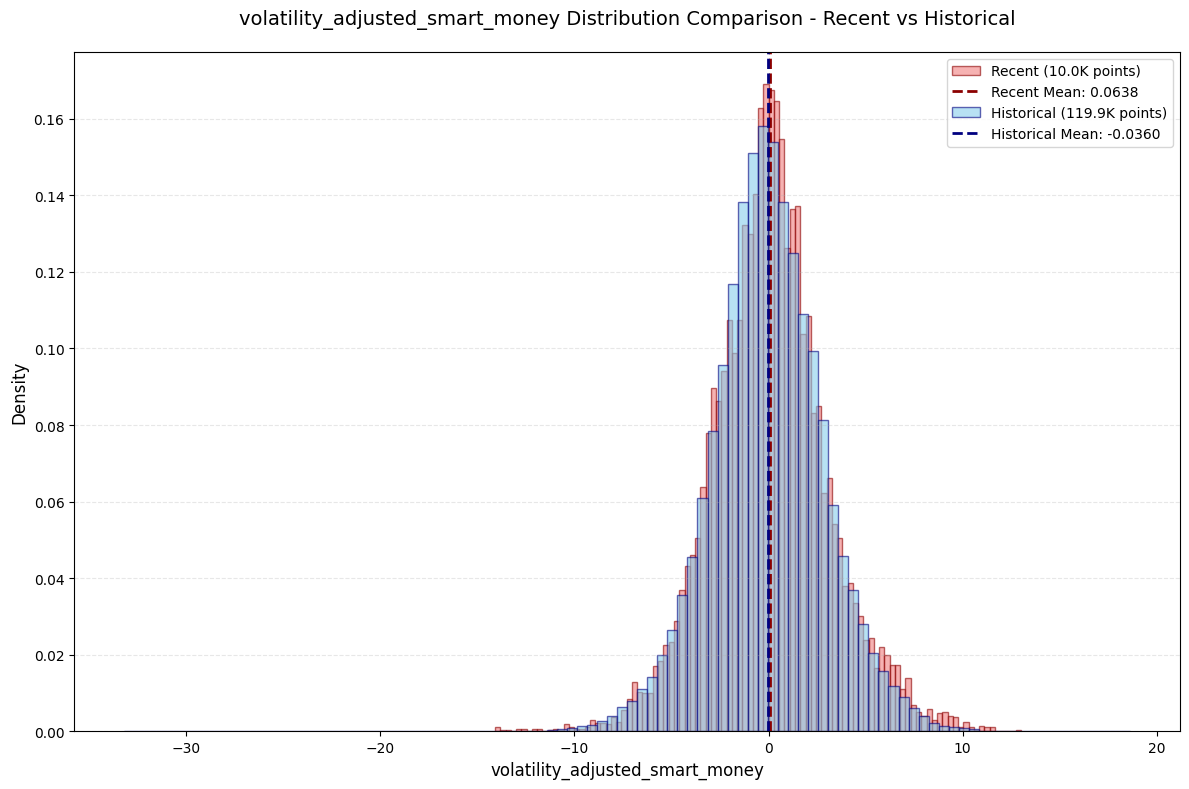

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [117]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)

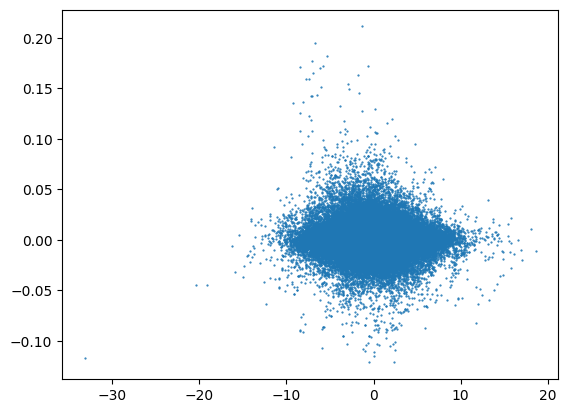

In [118]:
import matplotlib.pyplot as plt
plt.scatter(volatility_adjusted_smart_money(df),df['close'].pct_change(-10), s=0.3)

In [119]:
result['information_ratio']['group_correlations']

[-0.005690479421708624,
 -0.003914731865223965,
 -0.0036952703728465952,
 -0.00225535991639951,
 -0.0031267745708489112,
 0.01071825922976754,
 -0.015861811598163817,
 0.009147099093020599,
 0.0015208260529132249,
 0.03582757645098136]

In [120]:
print(result)

{'correlation_analysis': {'IC': 0.021200353270456367, 'Rank_IC': -0.02257081820553248}, 'information_ratio': {'IR': 0.17083232437479612, 'group_correlations': [-0.005690479421708624, -0.003914731865223965, -0.0036952703728465952, -0.00225535991639951, -0.0031267745708489112, 0.01071825922976754, -0.015861811598163817, 0.009147099093020599, 0.0015208260529132249, 0.03582757645098136], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0     -33.1798  -4.7299   -6.2753      -0.0008      0.0169   6498
1      -4.7298  -3.5340   -4.0732      -0.0004      0.0132   6497
2      -3.5337  -2.8134   -3.1487       0.0003      0.0129   6497
3      -2.8134  -2.2573   -2.5262       0.0002      0.0120   6497
4      -2.2572  -1.7951   -2.0210      -0.0002      0.0116   6498
5      -1.7950  -1.3987   -1.5940      -0.0001      0.0109   6497
6      -1.3987  -1.0442   -1.2197 